In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

Read data

In [4]:
data = pd.read_csv('ex1/ex1data1.txt', header=None)
data.columns = ['population', 'profit']
data[:10]

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


Visualize data

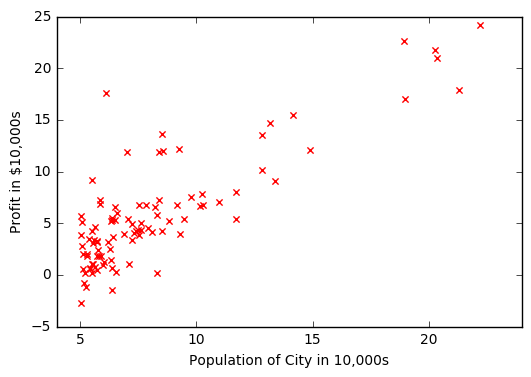

In [5]:
fig, ax = plot.subplots()
ax.scatter(data['population'], data['profit'], marker='x', c='r')
plot.axis([4, 24, -5, 25])
plot.xlabel('Population of City in 10,000s')
plot.ylabel('Profit in $10,000s')

Create sample

In [6]:
X = pd.DataFrame({'x0': np.ones(shape=(data.shape[0],)), 'x1': data['population']})
X[:5]

,x0,x1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [7]:
y = pd.DataFrame({'y': data['profit']})
y[:5]

,y
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [8]:
thetha = np.zeros(shape=(2))
thetha

array([ 0.,  0.])

In [9]:
iterations = 1500
alpha = 0.01

Cost function implementation

In [10]:
def J(X, y, thetha):
    m = X.shape[0]
    return X.dot(thetha).sub(y['y']).pow(2).sum() / (2 * m)

Cost function test

In [11]:
J(X, y, thetha)

32.072733877455676

In [12]:
def gradient_descent(X, y, thetha, alpha, iterations):
    m = X.shape[0]
    for i in xrange(iterations):
        thetha0 = thetha[0] - (alpha / m) * X.dot(thetha).sub(y['y']).dot(X['x0']).sum()
        thetha1 = thetha[1] - (alpha / m) * X.dot(thetha).sub(y['y']).dot(X['x1']).sum()
    return thetha0, thetha1

In [13]:
gradient_descent(X, y, thetha, alpha, iterations)

(0.058391350515463916, 0.65328849745556705)

In [14]:
def gradient_descent_v(X, y, thetha, alpha, iterations):
    m = X.shape[0]
    for i in xrange(iterations):
        h = X.dot(thetha)
        loss = h.sub(y['y'])
        gradient = X.transpose().dot(loss) / m
        thetha = thetha - alpha * gradient
    return thetha

In [15]:
result = gradient_descent_v(X, y, thetha, alpha, iterations)
result

x0   -3.630291
x1    1.166362
dtype: float64

In [22]:
reg_x = [0, 24]
reg_y = [result[1] + i * result[0] for i in reg_x]

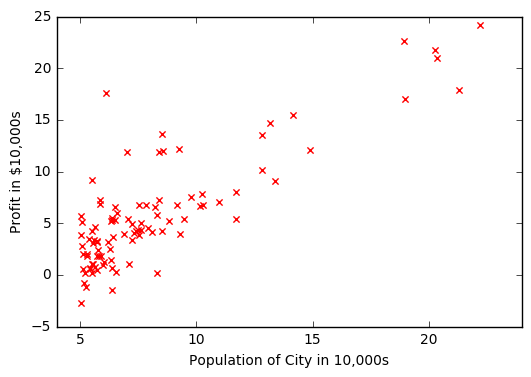

In [23]:
plot.axis([4, 24, -5, 25])
plot.xlabel('Population of City in 10,000s')
plot.ylabel('Profit in $10,000s')
plot.scatter(data['population'], data['profit'], marker='x', c='r')
plot.plot(dummy_x, [result[1] + i * result[0] for i in dummy_x])